In [7]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Covariance

서로 다른 populations으로 부터 가져온 samples을 비교할때, 가장 많이 사용되는 방법이 covariance와 correlation입니다.<br>
Sample covariance의 공식은 다음과 같습니다.

$$ S_{XY} = \frac{\sum^N_{i=1} (X_i - \bar{X})(Y_i - \bar{Y}) }{N-1} $$

위의 공식은 2개의 vectors의 covariance를 구할때 사용하고, numpy.cov 의 경우는 variance-covariance matrix로 표현이 됩니다. (covariance matrix라고도 합니다.)


## Example

수학, 영어 그리고 물리의 A학급의 점수가 다음과 같이 있을때 각 과목마다의 covariance는?

| Student | Math | English | Physics |
|:--------|:-----|:--------|:--------|
| A       | 4.0     | 2.0  | 0.6   |
| B       | 4.2     | 2.1  | 0.59  |
| C       | 3.9     | 2.0  | 0.58  |
| D       | 4.3     | 2.1  | 0.62  |
| E       | 4.1     | 2.2  | 0.63  |





[Numpy Covariance]
[[ 0.025    0.0075   0.00175]
 [ 0.0075   0.007    0.00135]
 [ 0.00175  0.00135  0.00043]]

[My Covariance]
[[ 0.025    0.0075   0.00175]
 [ 0.0075   0.007    0.00135]
 [ 0.00175  0.00135  0.00043]]


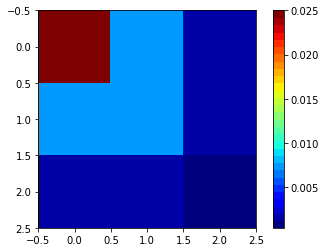

In [2]:
def covariance(data, data2=None, ddof=0):
    k = data.shape[0]
    N = data.shape[1]
    
    if data2 is not None:
        k += data2.shape[0]
        data = np.vstack((data, data2))
    
    cov = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            a = data[i]
            b = data[j]
            cov[i, j] = np.sum((a-np.mean(a)) * (b-np.mean(b)))/(N-ddof)
    return np.array(cov)


data = np.array([[4.0, 4.2, 3.9, 4.3, 4.1], 
                 [2.0, 2.1, 2.0, 2.1, 2.2], 
                 [0.6, 0.59, 0.58, 0.62, 0.63]])

print('[Numpy Covariance]')
print(np.cov(data))
print()
print('[My Covariance]')
print(covariance(data, ddof=1))

cax = imshow(np.cov(data), interpolation='nearest', cmap=cm.get_cmap('jet', 30))
colorbar(cax)

아래는 2개의 matrix에 대해서 covariance matrix 를 구하는 코드입니다.

[Numpy Covariance]
[[  1.           1.5         -2.5          3.        ]
 [  1.5          6.33333333  -3.16666667   6.83333333]
 [ -2.5         -3.16666667   6.33333333  -7.16666667]
 [  3.           6.83333333  -7.16666667  10.33333333]]

[My Covariance]
[[  1.           1.5         -2.5          3.        ]
 [  1.5          6.33333333  -3.16666667   6.83333333]
 [ -2.5         -3.16666667   6.33333333  -7.16666667]
 [  3.           6.83333333  -7.16666667  10.33333333]]


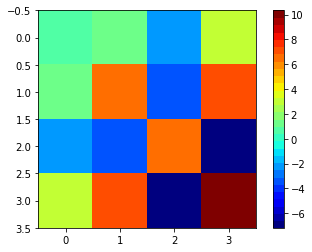

In [3]:
a = np.array([[1,2,3], [-1, 4, 2]])
b = np.array([[3, 1, -2], [-1, 4, 5]])

print('[Numpy Covariance]')
print(np.cov(a, b))
print()
print('[My Covariance]')
print(covariance(a, b, ddof=1))

cax = imshow(np.cov(a, b), interpolation='nearest', cmap=cm.get_cmap('jet', 30))
colorbar(cax)

남자와 여자의 키의 분포를 갖고서 covariance를 구합니다.

[Numpy Covariance]
[[ 8.19884325 -0.25129107]
 [-0.25129107  7.26994749]]

[My Covariance]
[[ 8.19884325 -0.25129107]
 [-0.25129107  7.26994749]]


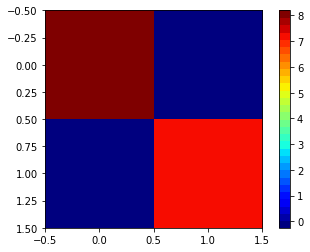

In [46]:
data = pd.read_csv('dataset/gender-height-weight.csv', usecols=(0, 1, 2))
x = np.array([data[data['Gender'] == 'Male']['Height'].as_matrix()])
y = np.array([data[data['Gender'] == 'Female']['Height'].as_matrix()])

print('[Numpy Covariance]')
print(np.cov(x, y))
print()
print('[My Covariance]')
print(covariance(x, y, ddof=1))

cax = imshow(np.cov(x, y), interpolation='nearest', cmap=cm.get_cmap('jet', 30))
colorbar(cax)

## Problems with Interpretation

Covariance의 값이 크면 클수록 strong relationship을 나타냅니다. <br>
하지만 서로 다른 수치를 갖은 값끼리 (원달러 vs 엔화, inches vs Km) 비교를 할 수는 없습니다.

해석의 가장 큰 문제점은 결과값의 range자체가 다양하기 때문에 해석의 어려움이 있습니다. <br>
예를 들어서 데이터가 달라짐에 따라서 결과값이 3이 될수도 있고, 500000이 될 수도 있습니다.<br>
300이라는 값이 두 variables사이의 관련성이 있다는 것을 설명할수는 있지만 `correlation coefficient`와는 다르게 정확하게 얼마나 강한 관계를 갖고 있는지는 설명을 못합니다.

# Correlation Coefficient

위에서 적었듯이 covariance는 해석상의 문제가 있습니다. (즉 관련성 있는건 알겠는데 정확하게 얼마나 관련성이 있는지 확신하기 어려움..) 이를 해결하기 위해서는 `Correlation coefficient`를 사용하면 되면 아래와 같은 공식을 사용하면 되며 **결과값의 range는 -1 그리고 1 사이의 값**을 갖습니다.

$$ Cor(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

In [4]:
def correlation_coefficient(data, data2=None, ddof=0):
    k = data.shape[0]
    N = data.shape[1]
    
    if data2 is not None:
        k += data2.shape[0]
        data = np.vstack((data, data2))
    
    cov = np.zeros((k, k))
    
    for i in range(k):
        for j in range(k):
            a = data[i]
            b = data[j]
            cov[i, j] = np.sum((a-np.mean(a)) * (b-np.mean(b)))/(N-ddof)
            cov[i, j] /= (np.std(a) * np.std(b))
    return np.array(cov)

print('[Numpy Correlation Coefficient]')
print(np.corrcoef(data))
print()
print('[My Correlation Coefficient]')
print(correlation_coefficient(data))

[Numpy Correlation Coefficient]
[[ 1.          0.56694671  0.533745  ]
 [ 0.56694671  1.          0.77812706]
 [ 0.533745    0.77812706  1.        ]]

[My Correlation Coefficient]
[[ 1.          0.56694671  0.533745  ]
 [ 0.56694671  1.          0.77812706]
 [ 0.533745    0.77812706  1.        ]]
